In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

In [67]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [19]:
import pathlib
data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

C:\Users\Jessy\.keras\datasets\flower_photos


In [21]:
for item in data_root.iterdir():
    print(item)

C:\Users\Jessy\.keras\datasets\flower_photos\daisy
C:\Users\Jessy\.keras\datasets\flower_photos\dandelion
C:\Users\Jessy\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\Jessy\.keras\datasets\flower_photos\roses
C:\Users\Jessy\.keras\datasets\flower_photos\sunflowers
C:\Users\Jessy\.keras\datasets\flower_photos\tulips


In [129]:
import random
all_image_paths = list(data_root.glob('*/*'))
#all_image_paths = list(data_root)
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

3670

In [130]:
all_image_paths[:10]

['C:\\Users\\Jessy\\.keras\\datasets\\flower_photos\\dandelion\\6012046444_fd80afb63a_n.jpg',
 'C:\\Users\\Jessy\\.keras\\datasets\\flower_photos\\daisy\\14333681205_a07c9f1752_m.jpg',
 'C:\\Users\\Jessy\\.keras\\datasets\\flower_photos\\tulips\\478765271_6a8ca1cfa1_m.jpg',
 'C:\\Users\\Jessy\\.keras\\datasets\\flower_photos\\tulips\\14084211971_0f921f11fe_n.jpg',
 'C:\\Users\\Jessy\\.keras\\datasets\\flower_photos\\dandelion\\9301891790_971dcfb35d_m.jpg',
 'C:\\Users\\Jessy\\.keras\\datasets\\flower_photos\\tulips\\7166646966_41d83cd703.jpg',
 'C:\\Users\\Jessy\\.keras\\datasets\\flower_photos\\daisy\\5435521200_92029bbe2b_n.jpg',
 'C:\\Users\\Jessy\\.keras\\datasets\\flower_photos\\roses\\15566697073_9a214b700e_n.jpg',
 'C:\\Users\\Jessy\\.keras\\datasets\\flower_photos\\tulips\\3253320570_b617f7fd4b.jpg',
 'C:\\Users\\Jessy\\.keras\\datasets\\flower_photos\\tulips\\486896118_bcc7b8e1d6.jpg']

In [135]:
import os
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

In [138]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    #return "Image (CC BY 2.0) " + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])
    return image_rel

#### Check out some images

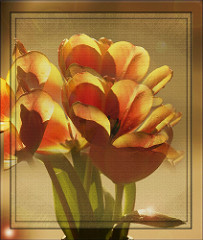

tulips\3446285408_4be9c0fded_m.jpg



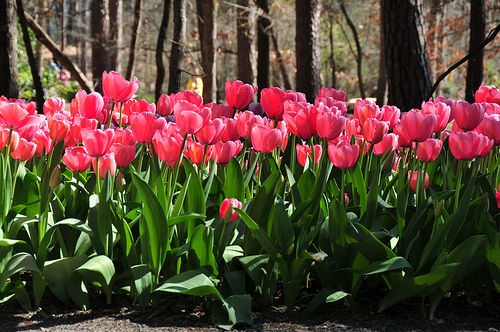

tulips\8706523526_a0f161b72b.jpg



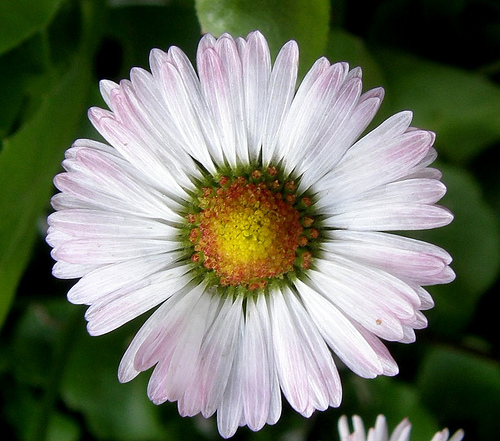

daisy\2573240560_ff7ffdd449.jpg



In [139]:
for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    print(caption_image(image_path))
    print()

#### Make some labels.

In [128]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

#### Create dict for labels with indices.

In [53]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

#### Creating list of every file, and it's label index.

In [54]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [1, 1, 4, 0, 2, 1, 1, 1, 4, 0]


#### Load and format imgs

In [55]:
img_path = all_image_paths[0]
img_path

'C:\\Users\\Jessy\\.keras\\datasets\\flower_photos\\dandelion\\2473862606_291ae74885.jpg'

In [56]:
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+'...')

<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\...


#### Decoding into tensor

In [57]:
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(301, 500, 3)
<dtype: 'uint8'>


#### Resizing

In [58]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
1.0


In [59]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [192, 192])
    image /= 255.0 #normalize to [0,1] range
    
    return image

In [60]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

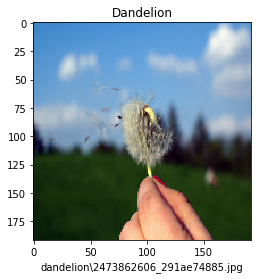

In [140]:
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path))
plt.title(label_names[label].title())
print()